In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df_train = pd.read_table("crime-train.txt")
df_test = pd.read_table("crime-test.txt")

In [9]:
x_train = df_train.drop("ViolentCrimesPerPop",axis = 1)
y_train = df_train["ViolentCrimesPerPop"]
x_test = df_test.drop("ViolentCrimesPerPop",axis = 1)
y_test = df_test["ViolentCrimesPerPop"]

In [10]:
def lasso_descent(x,y,w_origin,tolerance = 0.01,L=1):
    diff = 1
    d = x.shape[1]
    n = x.shape[0]
    w = w_origin
    b = np.sum(y-x.dot(w))/n 
    a = np.zeros(d)
    c = np.zeros(d)
    while diff > tolerance:
        w0 = w.copy()
        for k in range(0,d):
            a[k] = 2*np.sum(np.square(x[:,k]))
            w[k]=0
            c[k] = 2*np.sum(x[:,k]*(y-b-x.dot(w)))
            if c[k] < -L:
                w[k] = (c[k]+L)/a[k]
            elif c[k] > L:
                w[k] = (c[k]-L)/a[k]
            else:
                w[k] =0
            #print('w[k]')
            #print(w[k])
        diff = np.max(np.abs(w - w0))
        #print(diff)
    #print('final')
    return w,b

In [11]:
def non_zero(w):
    non_z = w[w!=0]
    return non_z.shape[0]

In [12]:
def max_L(x,y):
    d = x.shape[1]
    n = x.shape[0]
    l = np.zeros(d)
    for i in range(0,d):
        l[i] = 2*np.abs(x[:,i].T.dot((y-np.mean(y))))
    l_max = np.max(l)
    return(l_max)

In [13]:
#A5.a
def plota(x,y):
    x = np.array(x)
    y = np.array(y)
    l = max_L(x,y)
    d = x.shape[1]
    n = x.shape[0]
    w = np.zeros(d)
    non_z = 0
    k = 100
    l_nonzero = list()
    l_lambda = list()
    l_nonzero.append(non_z)
    l_lambda.append(l)
    while (non_z!=d):
        l = l/2
        w,b = lasso_descent(x,y,w,tolerance = 0.1,L=l)
        non_z = non_zero(w)
        l_nonzero.append(non_z)
        l_lambda.append(l)
    fig, ax = plt.subplots(figsize=(16,9))
    sns.lineplot(l_lambda, l_nonzero)
    sns.scatterplot(l_lambda, l_nonzero)
    plt.xscale('log')
    ax.set_xlabel("Log Labmda")
    ax.set_ylabel("# of non-zero")
    plt.savefig('./a5a.png')



In [14]:
## A5.b
def plotb(x,y,index_interest):
    x = np.array(x)
    y = np.array(y)
    l = max_L(x,y)
    d = x.shape[1]
    n = x.shape[0]
    non_z = 0
    l_nonzero = list()
    l_lambda = list()
    l_nonzero.append(non_z)
    l_lambda.append(l)
    w = np.zeros(d)
    w1 = list()
    w2 = list()
    w3 = list()
    w4 = list()
    w5 = list()
    for i in [w1,w2,w3,w4,w5]:
        i.append(0)
    while (l >= 0.01):
        l = l/2
        w,b = lasso_descent(x,y,w,tolerance = 0.0001,L=l)
        non_z = non_zero(w)
        w1.append(w[index_interest[0]])
        w2.append(w[index_interest[1]])
        w3.append(w[index_interest[2]])
        w4.append(w[index_interest[3]])
        w5.append(w[index_interest[4]])
        l_lambda.append(l)
    fig, ax = plt.subplots(figsize=(16,9))
    n = 0
    print(len(w))
    for i in [w1,w2,w3,w4,w5]:
        sns.lineplot(l_lambda, i)
        sns.scatterplot(l_lambda, i,label = coeff_interest[n])
        n = n + 1
    plt.xscale('log')
    ax.set_xlabel("Log Labmda")
    ax.set_ylabel("w")
    plt.legend()
    plt.savefig('./a5b.png')

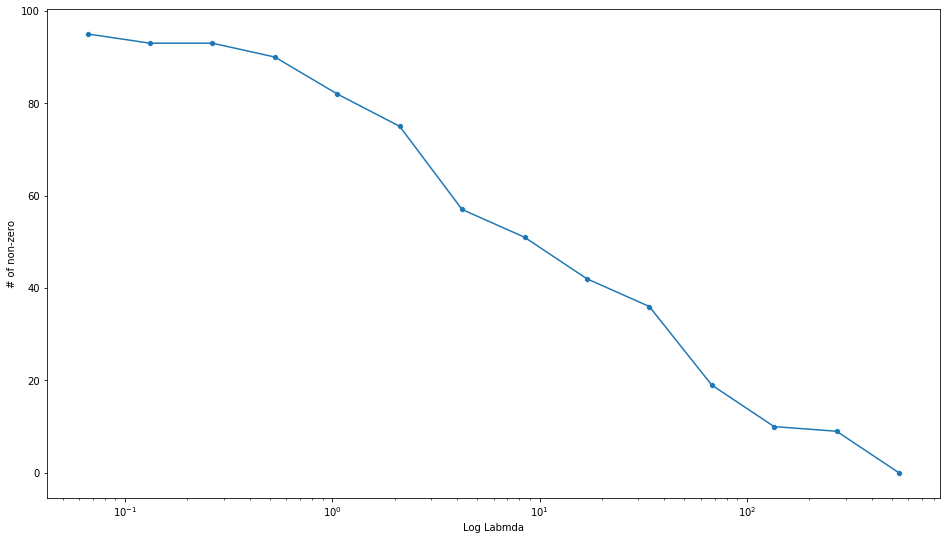

In [15]:
plota(x_train,y_train)

95


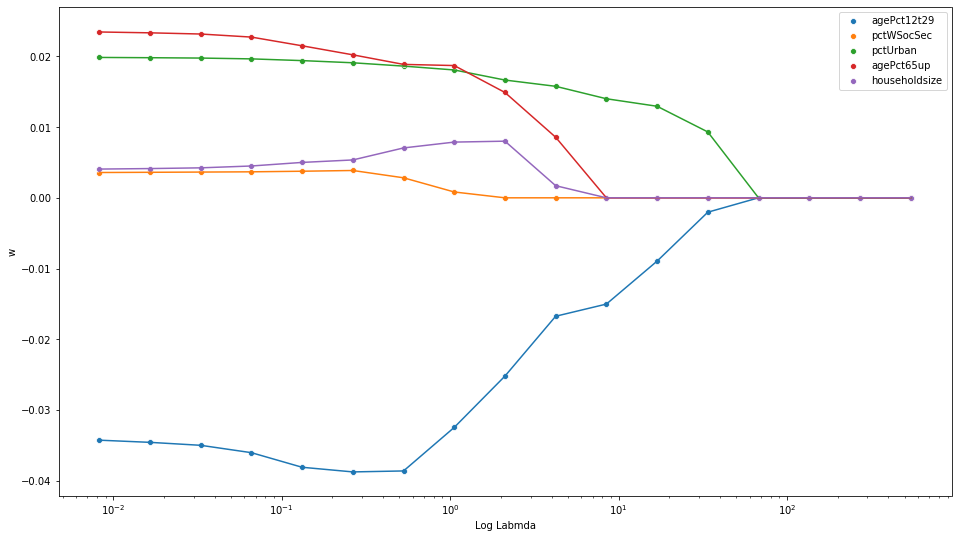

In [16]:
# A4.b

feature_list = list(x_train.columns)
coeff_interest = ['agePct12t29','pctWSocSec','pctUrban','agePct65up','householdsize']
index_interest = list()
for i in coeff_interest:
    index_interest.append(feature_list.index(i))
plotb(x_train,y_train,index_interest)

In [18]:
def plotc(x_train,y_train, x_test,y_test):
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_test = np.array(x_test)
    y_test = np.array(y_test)
    l = max_L(x_train,y_train)
    d = x_train.shape[1]
    n = x_train.shape[0]
    w = np.zeros(d)
    se_train = list()
    se_test = list()
    l_lambda = list()
    non_z = 0
    while (non_z!=d):
        l = l/2
        w,b = lasso_descent(x_train,y_train,w,tolerance = 0.01,L=l)
        non_z = non_zero(w)
        l_lambda.append(l)
        train_error = np.mean(np.square(y_train - x_train.dot(w)-b))
        test_error = np.mean(np.square(y_test - x_test.dot(w)-b))
        print(test_error)
        se_train.append(train_error)
        se_test.append(test_error)
    fig, ax = plt.subplots(figsize=(16,9))
    sns.lineplot(l_lambda, se_train)
    sns.scatterplot(l_lambda, se_train, label ="training dataset")
    sns.lineplot(l_lambda, se_test)
    sns.scatterplot(l_lambda, se_test, label ="test dataset")
    plt.xscale('log')
    ax.set_xlabel("Log Labmda")
    ax.set_ylabel("Squared Error")
    plt.savefig('./a5c.png')


In [13]:
np.mean(np.square(y_test))

0.11610551378446116

In [35]:
#a5d
def plotd(x,y):
    x = np.array(x)
    y = np.array(y)
    d = x.shape[1]
    n = x.shape[0]
    w = np.zeros(d)
    non_z = 0
    k = 100
    l = 30
    w,b = lasso_descent(x,y,w,tolerance = 0.001,L=l)
    return w


0.033026185292365604
0.025294679743480725
0.022722774992803188
0.02194400420564093
0.021623588755759527
0.02146597320411338
0.021430326266966983
0.021519882941683433
0.021606790436407664
0.02167080855866053
0.021705933288223195
0.02172049750684196
0.021720603589458085
0.02171221979724761
0.02169941762276054


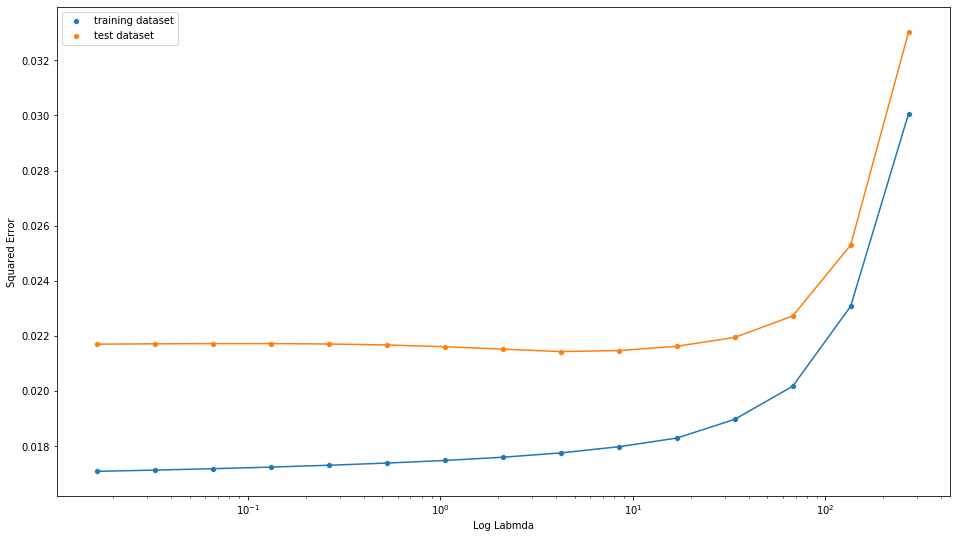

In [36]:
plotc(x_train,y_train, x_test,y_test)

In [37]:
wd =plotd(x_train,y_train)
l_w = list(wd)

In [38]:
index_max = l_w.index(wd.max())
index_min = l_w.index(wd.min())

In [39]:
feature_max = feature_list[index_max]
feature_min = feature_list[index_min]

In [45]:
wd.min()

-0.07018255031001426

In [44]:
feature_min

'PctKids2Par'

In [27]:
wd.min()

-0.06894368186032496